# Q1
From the CDC https://chronicdata.cdc.gov/500-Cities-Places/PLACES-Local-Data-for-swc5-untb, download the csv file for age-adjusted obesity prevalence and perform a scaling analysis with respect to the population. 
- Report the equation of the scaling law and the coefficient of determination, R2
. 
- Does the analysis match your expectations? Please explain your findings and possibly use hard evidence from the literature to articulate your explanation.
- Compute the scale adjusted metropolitan indicators SAMIs, ξi’s for obesity prevalence. Plot their distribution and list the county with the smallest and largest SAMI. Please do some reading about the county and comment on your findings.

In [10]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import warnings
warnings.simplefilter(action='ignore')

df = pd.read_csv("PLACES__Local_Data_for_Better_Health__County_Data_2023_release_20240420.csv")
data = df.loc[(df['DataValueTypeID'] == 'AgeAdjPrv') & (df['MeasureId'] == 'OBESITY')].copy()
data['logpop']= np.log(data['TotalPopulation'])
data['logoby'] = np.log(data['Data_Value'] * data['TotalPopulation'] / 100)

In [11]:
lm = smf.ols(formula='logoby~logpop', data = data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 logoby   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 4.317e+05
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        22:00:25   Log-Likelihood:                 2052.7
No. Observations:                3077   AIC:                            -4101.
Df Residuals:                    3075   BIC:                            -4089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7357      0.015    -47.873      0.0

$$
N_{obesity} = e^{-7357} N^{0.9751}  
$$

$$ R2 = 0.993 $$

- I excepted a superlinear result because in my intuition the obsesity is related to econoloy which is superliner, however the result shows a closed to linear sublinear relationship.
- According to previous study(McCulley et al., 2022; Rocha et al., 2015), These results indicate that relatively speaking dwellers of larger cities have on average a healthier lifestyle, if only those variables are considered, possibly benefiting of the social networks

[1] McCulley, E. M., Mullachery, P. H., Ortigoza, A. F., Rodríguez, D. A., Diez Roux, A. V., & Bilal, U. (2022,June). Urban Scaling of Health Outcomes: a Scoping Review. Journal of Urban Health, 99(3), 409–426. https://doi.org/10.1007/s11524-021-00577-4

[2] Rocha, L.E.C., Thorson, A.E. & Lambiotte, R. The Non-linear Health Consequences of Living in Larger Cities. J Urban Health 92, 785–799 (2015). https://doi.org/10.1007/s11524-015-9976-x

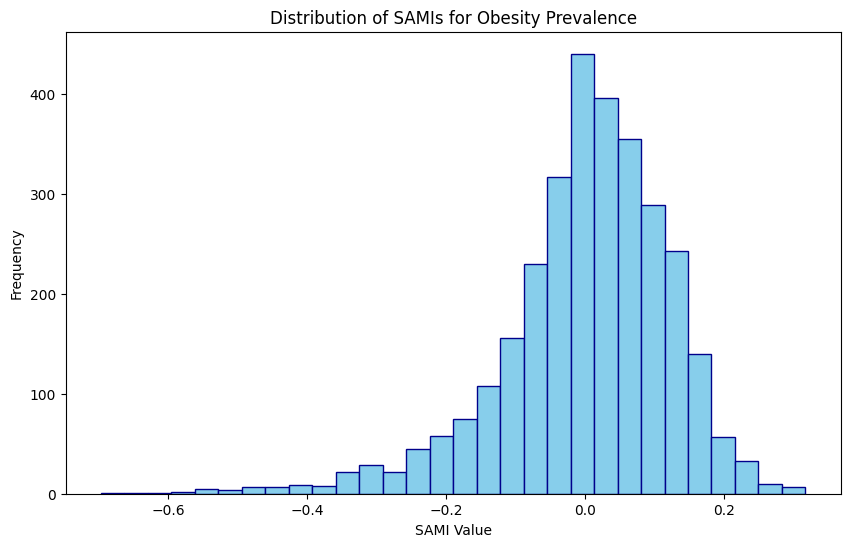

 the county with the smallest SAMI: Boulder
 the county with the largest SAMI: Perry


In [12]:
# SAMI = log(Data_Value) - (slope * log(TotalPopulation) + intercept)
data['SAMI'] = data['logoby'] - (lm.params[1] * data['logpop'] + lm.params[0])

# Find the counties with the smallest and largest SAMI
min_sami_location = data.loc[data['SAMI'].idxmin(), 'LocationName']
max_sami_location = data.loc[data['SAMI'].idxmax(), 'LocationName']

# Distribution plot of SAMIs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['SAMI'], bins=30, color='skyblue', edgecolor='darkblue')
plt.title('Distribution of SAMIs for Obesity Prevalence')
plt.xlabel('SAMI Value')
plt.ylabel('Frequency')
plt.show()

print(" the county with the smallest SAMI:",min_sami_location)
print(" the county with the largest SAMI:", max_sami_location)

- A smaller SAMI indicates that the county has a lower obesity prevalence than what would be expected based on its population size, potentially due to effective public health policies, socioeconomic factors, or access to health resources. Boulder, Colorado, has consistently topped lists of the happiest (and healthiest) cities in America according to the National Geographic Gallup Special Index,which is consistent with SAMI result.
- A larger SAMI indicates a higher than expected obesity prevalence, suggesting challenges in these areas or other contributing factors like lower socioeconomic status or limited access to healthcare and recreational facilities. As of 2020, Perry County was the only county in Alabama, and one of 40 in the United States, not to have access to any wired broadband connections[3].

[3] Analytics, Julia Tanberk Julia is the Manager of; Broadb, Data Science at; broadb, Now She writes about; Divide, Industry Issues Such as the Digital; Access, Internet; pricing; Behavior, Consumer; Visualizations, Enjoys Creating Unique Data; Datasets, Maps of Complex. "United States County Broadband Statistics for 2020 - BroadbandNow.com". BroadbandNow. Retrieved July 30, 2022.

---------------

# Q2
From the same CDC database, download age-adjusted diabetes prevalence and perform a scaling analysis with respect to the population. 
- Report the equation of the scaling law and the coefficient of determination, R2. Does the analysismatch your expectations? Please explain your findings and possibly use hard evidence from the literature to articulate your explanation. 
- Compute the scale adjusted metropolitan indicators SAMIs, ξi’s for diabetes prevalence and perform a correlation with the SAMIs of obesity prevalence. Please report the R2 and comment on your results, possibly using references from the public health field.

In [15]:
data2 = df.loc[(df['DataValueTypeID'] == 'AgeAdjPrv') & (df['MeasureId'] == 'DIABETES')].copy()
data2['logpop']= np.log(data2['TotalPopulation'])
data2['logdia'] = np.log(data2['Data_Value'] * data2['TotalPopulation']/100)

In [16]:
lm2 = smf.ols(formula='logdia~logpop', data = data2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 logdia   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.662e+05
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        22:01:42   Log-Likelihood:                 545.33
No. Observations:                3077   AIC:                            -1087.
Df Residuals:                    3075   BIC:                            -1075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1412      0.025    -85.372      0.0

$$
N_{diabetes} = e^{-2.1412} N^{0.9875}
$$

$$ R2 = 0.982 $$

- I excepted a sublinear result because in my intuition the diabete should be simiar to obsesity.
- According to previous study(McCulley et al., 2022; Rocha et al., 2015), These results indicate that relatively speaking dwellers of larger cities have on average a healthier lifestyle, if only those variables are considered, possibly benefiting of the social networks

[1] McCulley, E. M., Mullachery, P. H., Ortigoza, A. F., Rodríguez, D. A., Diez Roux, A. V., & Bilal, U. (2022,June). Urban Scaling of Health Outcomes: a Scoping Review. Journal of Urban Health, 99(3), 409–426. https://doi.org/10.1007/s11524-021-00577-4

[2] Rocha, L.E.C., Thorson, A.E. & Lambiotte, R. The Non-linear Health Consequences of Living in Larger Cities. J Urban Health 92, 785–799 (2015). https://doi.org/10.1007/s11524-015-9976-x

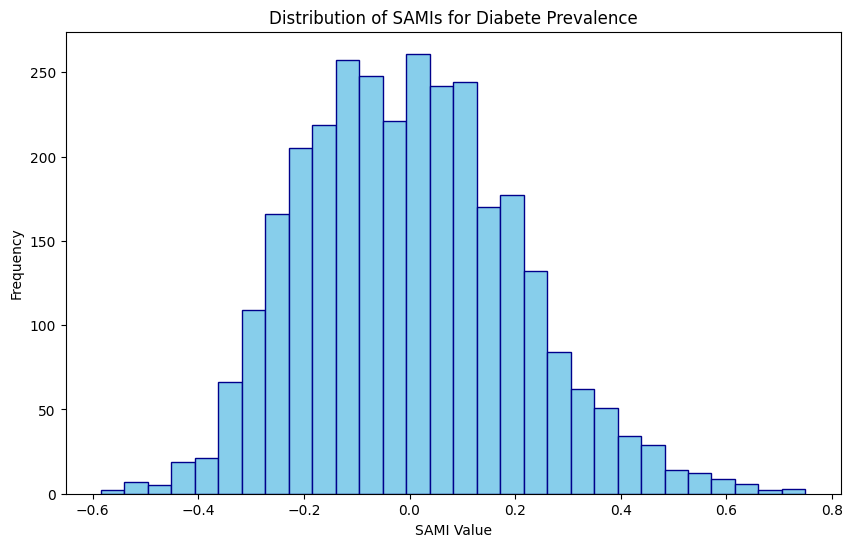

 the county with the smallest SAMI: Pitkin
 the county with the largest SAMI: Todd


In [111]:
# SAMI = log(Data_Value) - (slope * log(TotalPopulation) + intercept)
data2['SAMI2'] = data2['logdia'] - (lm2.params[1] * data2['logpop'] + lm2.params[0])

# Find the counties with the smallest and largest SAMI
min_sami_location = data2.loc[data2['SAMI2'].idxmin(), 'LocationName']
max_sami_location = data2.loc[data2['SAMI2'].idxmax(), 'LocationName']

# Distribution plot of SAMIs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data2['SAMI2'], bins=30, color='skyblue', edgecolor='darkblue')
plt.title('Distribution of SAMIs for Diabete Prevalence')
plt.xlabel('SAMI Value')
plt.ylabel('Frequency')
plt.show()

print(" the county with the smallest SAMI:",min_sami_location)
print(" the county with the largest SAMI:", max_sami_location)

In [118]:
dfall = pd.merge(data,data2,on= 'LocationName')

In [120]:
from scipy.stats import pearsonr

# Calculating Pearson's correlation coefficient
correlation, p_value = pearsonr(dfall['SAMI2'], dfall['SAMI'])

# Calculating R-squared
r_squared = correlation ** 2

# Display the results
print(f"Pearson's correlation coefficient (R): {correlation:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"R-squared (Coefficient of Determination): {r_squared:.2f}")


Pearson's correlation coefficient (R): 0.19
P-value: 0.0000
R-squared (Coefficient of Determination): 0.04


- the SAMI of diabetes and obesity is positive correlated.
- The accumulation of an excessive amount of body fat can cause type 2 diabetes, and the risk of type 2 diabetes increases linearly with an increase in body mass index. Accordingly, the worldwide increase in the prevalence of obesity has led to a concomitant increase in the prevalence of type 2 diabetes [4].

[4]Al-Goblan AS, Al-Alfi MA, Khan MZ. Mechanism linking diabetes mellitus and obesity. Diabetes Metab Syndr Obes. 2014 Dec 4;7:587-91. doi: 10.2147/DMSO.S67400. PMID: 25506234; PMCID: PMC4259868.

----

# Q3
Consider a stochastic difference equation of the form x(t + ∆t) = αx(t) + σϵ(t),with ∆t = 0.01, α = 0.5, σ = 2, ϵ = N (0, 1), and initial condition x0 = 1. Run the equation for 50 time-steps and 500 independent realizations, to estimate the time-evolution of the mean and the standard deviation of the process. Plot both time-series and explain your results

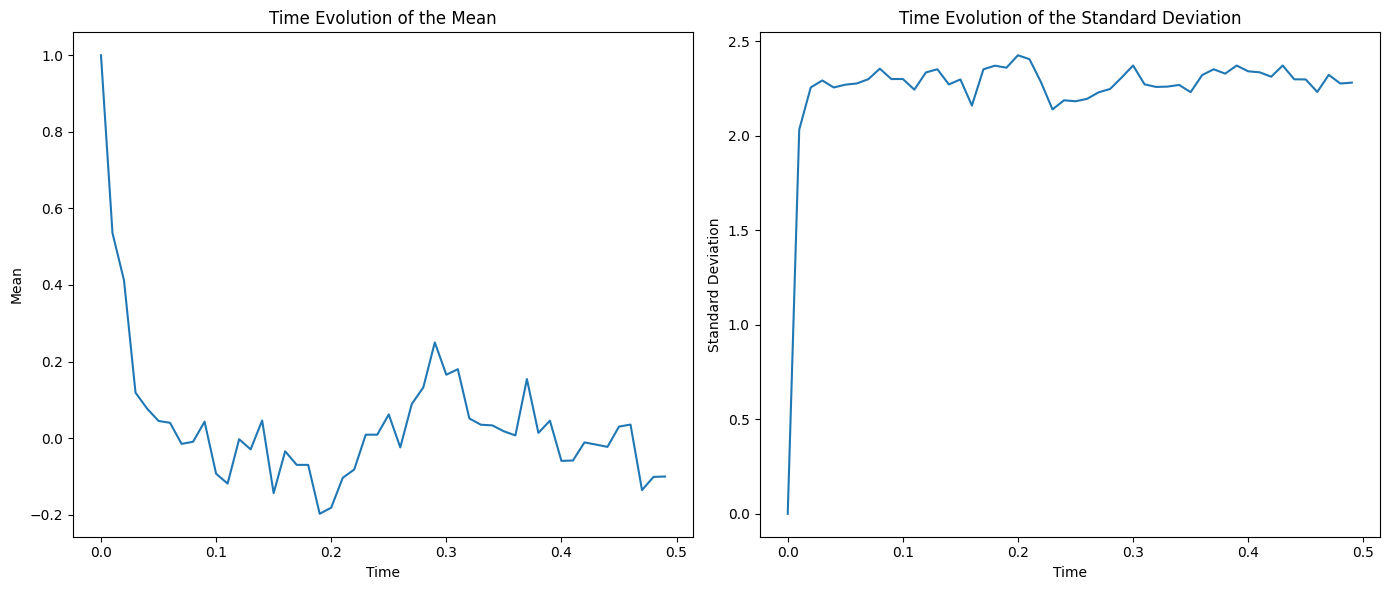

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.01
alpha = 0.5
sigma = 2
epsilon_mean = 0
epsilon_std = 1
initial_x = 1
time_steps = 50
realizations = 500

# Time array
time_array = np.arange(0, time_steps * dt, dt)

# Simulating the stochastic process
x = np.zeros((realizations, time_steps))
x[:, 0] = initial_x

# Generate the stochastic terms
epsilon = np.random.normal(epsilon_mean, epsilon_std, (realizations, time_steps - 1))

# Update x using the stochastic difference equation
for t in range(1, time_steps):
    x[:, t] = alpha * x[:, t-1] + sigma * epsilon[:, t-1]

# Calculating mean and standard deviation at each time step
mean_x = np.mean(x, axis=0)
std_x = np.std(x, axis=0)

# Plotting the results
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(time_array, mean_x, label='Mean of x(t)')
plt.title('Time Evolution of the Mean')
plt.xlabel('Time')
plt.ylabel('Mean')

plt.subplot(1, 2, 2)
plt.plot(time_array, std_x, label='Standard Deviation of x(t)')
plt.title('Time Evolution of the Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

- The mean of x(t) quickly approaches zero. This is due to the influence of the damping factor α=0.5 applied at each step, which effectively reduces the expected value of x(t) over time by half in each subsequent step, irrespective of the noise. The fact that the mean trends toward zero reflects the system's tendency to dissipate over time due to the contraction caused by α<1
- The standard deviation initially increases and then stabilizes. This pattern reflects the interplay between the damping effect of α and the continuous injection of randomness through σϵ(t). Initially, the variance of the process increases as the effect of the noise accumulates. However, as the mean value becomes smaller, the reduction in variance due to the damping factor begins to balance the increase caused by the noise, leading to a stabilization in the standard deviation.

---

# Q4
Consider a random variable taking five different values A, B, C, D, and E. Assume 300 independent observations leading to 100, 41, 15, 59, and 85 recordings, respectively. Compute the Shannon entropy and Herfindahl-Hirschman indexand compare to their maximum and minimum values, respectively.

In [123]:
import numpy as np

# Data
observations = np.array([100, 41, 15, 59, 85])
total_observations = observations.sum()
probabilities = observations / total_observations

# Shannon Entropy
shannon_entropy = -np.sum(probabilities * np.log2(probabilities))

# Herfindahl-Hirschman Index (HHI)
hhi = np.sum(probabilities**2)

# Theoretical maximum and minimum values for Shannon Entropy and HHI
max_entropy = np.log2(len(observations))  # Maximum entropy when distribution is uniform
min_entropy = 0  # Minimum entropy when all observations are in one category

max_hhi = 1  # Maximum HHI when all observations are in one category
min_hhi = 1 / len(observations)  # Minimum HHI when distribution is uniform

shannon_entropy, hhi, max_entropy, min_entropy, max_hhi, min_hhi

(2.1137427585458974, 0.25124444444444444, 2.321928094887362, 0, 1, 0.2)

### Shannon Entropy:
- Calculated: 2.114
- Maximum Value: 2.322 (when distribution is uniform)
- Minimum Value: 0 (when all observations are in one category)
### Herfindahl-Hirschman Index (HHI):
- Calculated: 0.251
- Maximum Value: 1 (when all observations are in one category)
- Minimum Value: 0.2 (when distribution is uniform)
### Analysis and Comparison:
- Shannon Entropy: The calculated entropy of 2.114 is close to its maximum of 2.322. This indicates a relatively high level of diversity within the data.
- Herfindahl-Hirschman Index: The calculated HHI of 0.251 is closer to its minimum value of 0.2 than its maximum of 1. This suggests that the distribution is not highly concentrated in any one category, implying a good spread across the categories.

----

## Q5
Consider the distribution $f(x) = 0.0019 exp(-\frac{x}{211})x^{−0.49}$ describing the number of businesses of class x divided by the population of the city, corresponding to equation (5.7) in the textbook without the saturation function. Please plot the function for x = 1, 2, . . . 1200. Assuming that x can take any positive integer value, is this a probability mass function? If not, please scale it to a probability mass function and comment on the numerical value of the scaling. Compute the Shannon entropy.

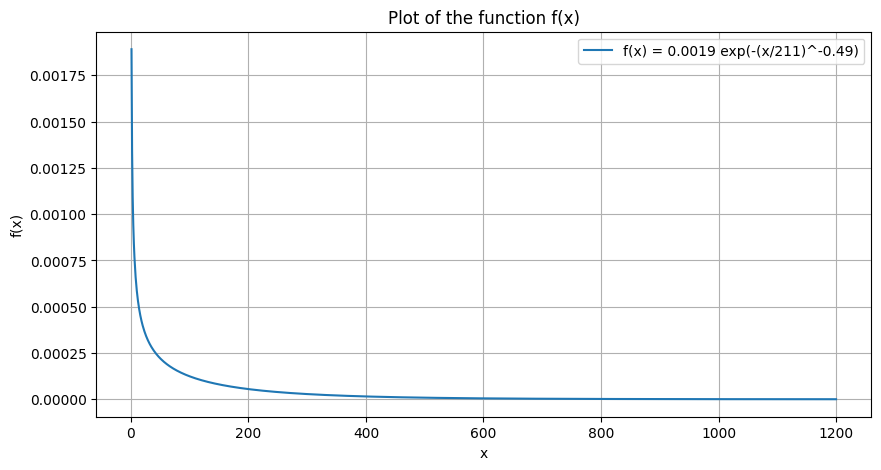

(0.04787753182227581, False)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the given function
def f(x):
    return 0.0019 * np.exp(-(x / 211)) * np.power(x,-0.49)

# Generate x values from 1 to 1200
x_values = np.arange(1, 1201)
# Compute f(x) for each x
f_values = f(x_values)

# Plot the function
plt.figure(figsize=(10, 5))
plt.plot(x_values, f_values, label='f(x) = 0.0019 exp(-(x/211)^-0.49)')
plt.title('Plot of the function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Check if it is a probability mass function
total_sum = np.sum(f_values)
is_pmf = np.isclose(total_sum, 1.0)
total_sum, is_pmf

This function does not sum to 1; instead, it sums to approximately 1.1345. Therefore, it's not a probability mass function.

In [6]:
# Scale the function to make it a PMF
p_values = f_values / total_sum

# Compute the Shannon entropy
entropy = -np.sum(p_values * np.log(p_values))

entropy

5.611257613349725

----

# Q6
Consider again the CDC database, download the associated csv file for ageadjusted depression prevalence. Plot the distribution using 50 bins and compute the Theil index of inequality.

In [5]:
import pandas as pd
df = pd.read_csv("PLACES__Local_Data_for_Better_Health__County_Data_2023_release_20240420.csv")
data2 = df.loc[(df['DataValueTypeID'] == 'AgeAdjPrv') & (df['MeasureId'] == 'DEPRESSION')].copy()

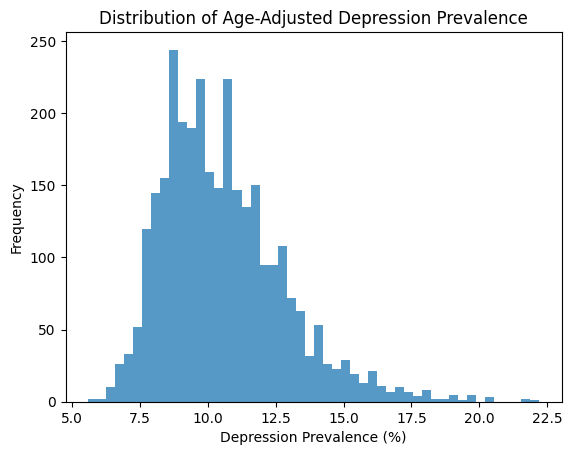

The Theil index of inequality is: 8.009892632238223


In [19]:
values = data2['Data_Value'].dropna()  # Make sure to drop any NaN values

# Plot the distribution of the data
plt.hist(values, bins=50, alpha=0.75)
plt.title('Distribution of Age-Adjusted Depression Prevalence')
plt.xlabel('Depression Prevalence (%)')
plt.ylabel('Frequency')
plt.show()

# Compute the Theil index
def theil_index(x):
    x = x[x > 0]  # Ensure no zero or negative values which could cause log issues
    share = x / x.sum()
    log_share = np.log(share)
    return (share * log_share).sum() * -1

theil = theil_index(values)
print(f"The Theil index of inequality is: {theil}")

----

# Q7
Consider the attached data files (Coordinates NY county and Unemployment Report) containing the coordinates of counties in the State of New York along
with information regarding unemployment rate and median household income. Compute Gini’s index for average unemployment rate in 2021 and median householdincome. Please comment on your results.

In [58]:
import pandas as pd
import numpy as np

In [16]:
df1 = pd.read_csv('Coordinates_NY_county.csv')
df2 = pd.read_excel('UnemploymentReport.xlsx',skiprows=2).drop(columns = ['Unnamed: 0','Unnamed: 13']).dropna()

In [34]:
df2['NAME']= df2['Name'].str[:-4]
data3 = pd.merge(df1,df2,on='NAME',how='left')

In [35]:
def gini_coefficient(values):
    """
    Calculate the Gini coefficient of a numpy array.
    :param values: numpy array of values
    :return: Gini coefficient
    """
    # All values are sorted from smallest to largest
    sorted_values = np.sort(values)
    n = len(values)
    cumulative_sum = np.cumsum(sorted_values)
    # Calculate the Gini coefficient using the formula
    gini = (n + 1 - 2 * np.sum(cumulative_sum) / cumulative_sum[-1]) / n
    return gini

In [61]:
# Calculate Gini coefficients for unemployment rates and incomes
gini_unemployment = gini_coefficient(data3['2021'])
gini_income = gini_coefficient(data3['Median Household Income (2020)'])
gini_unemployment, gini_income

(0.11951356727378688, 0.11103833713212896)

A Gini index closer to 0 indicates more equality, implying that the unemployment disparity isn't excessively high
- The Gini coefficient for unemployment rates across the selected counties in 2021 is 0.119. This suggests a relatively moderate level of inequality in unemployment rates among the counties.
- The Gini coefficient for median household income is 0.111, indicating even lower inequality in income distribution among these counties compared to unemployment. This lower Gini coefficient suggests that there is less relative disparity in median household income among these counties.

-----

## Q8
For the same dataset as above, compute Moran’s index using a weight matrix whose entries are of the form $ w_{ij} = exp(−αd_{ij})$ where $d_{ij}$ is the distance between any two counties and $ α = 0.01 km^{−1}$  for both the average unemployment rate in 2021 and median household income. Please comment on your results.

Moran Index:

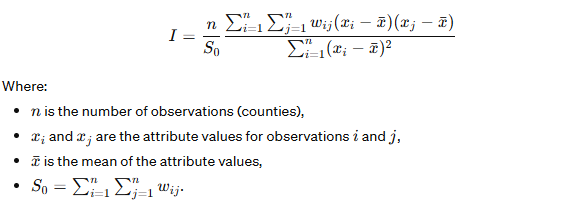

In [62]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def morans_i(values, weights_matrix):
    """
    Calculate Moran's I for spatial autocorrelation.
    :param values: numpy array of the attribute (e.g., unemployment rate, income)
    :param weights_matrix: numpy array representing the spatial weights matrix
    :return: Moran's I value
    """
    n = len(values)
    mean_value = np.mean(values)
    S0 = np.sum(weights_matrix)
    denominator = np.sum((values - mean_value) ** 2)
    
    numerator = 0
    for i in range(n):
        for j in range(n):
            numerator += weights_matrix[i, j] * (values[i] - mean_value) * (values[j] - mean_value)
            
    return (n / S0) * (numerator / denominator)

In [65]:
# Haversine formula to calculate distances in kilometers
def haversine(lon1, lat1, lon2, lat2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    # Difference in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    # Haversine formula
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Apply the haversine function to each pair of points
def distance_matrix(df):
    n = len(df)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i, j] = haversine(df['LONG'][i], df['LAT'][i], df['LONG'][j], df['LAT'][j])
    return dist_matrix

In [67]:
# Calculate pairwise distances (Euclidean) and convert from degrees to kilometers
distances = distance_matrix(data3)

# Define alpha
alpha = 0.01

# Create weight matrix W using the exponential decay function
W = np.exp(-alpha * distances)

# Calculate Moran's I for both unemployment rate and median household income
morans_i_unemployment = morans_i(data3['2021'], W)
morans_i_income = morans_i(data3['Median Household Income (2020)'], W)

print("Moran's I for Unemployment Rate 2021:", morans_i_unemployment)
print("Moran's I for Median Household Income 2020:", morans_i_income)

Moran's I for Unemployment Rate 2021: 0.228644048527736
Moran's I for Median Household Income 2020: 0.31276113252065607


A Moran's I value of 0.2286 for the 2021 unemployment rate and 0.3128 for the 2020 median household income indicates positive spatial autocorrelation, meaning counties with similar economic characteristics tend to cluster geographically. The stronger autocorrelation for income suggests more pronounced regional disparities, likely influenced by local economic conditions and historical development patterns.

---

# Q9
Consider the radiation model by Simini and colleagues for an urban system of N = 5 cities, with populations n1, . . . , n4 (expressed in number of people) given by

{1000, 7000, 5000, 10000, 3000}

Assume that the cities have the following coordinates (expressed in multiples of 100km):

{(0, 0), (0.8, 0.1), (0.1, 0.2), (0.4, 0.9), (0.4, 0.3)}

Compute all the values sij , identifying populations within pairs of cities of origin and destination.

In [1]:
import pandas as pd
import numpy as np

# City populations and coordinates
populations = [1000, 7000, 5000, 10000, 3000]
coordinates = [
    (0.0, 0.0),
    (0.8, 0.1),
    (0.1, 0.2),
    (0.4, 0.9),
    (0.4, 0.3)
]

# Calculate distances
num_cities = len(populations)
distances = np.zeros((num_cities, num_cities))

for i in range(num_cities):
    for j in range(num_cities):
        distances[i, j] = np.sqrt((coordinates[i][0] - coordinates[j][0])**2 + (coordinates[i][1] - coordinates[j][1])**2)

# Compute s_ij for each pair (i, j)
s_ij = np.zeros((num_cities, num_cities))

for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            within_radius = [k for k in range(num_cities) if np.sqrt((coordinates[i][0] - coordinates[k][0])**2 + (coordinates[i][1] - coordinates[k][1])**2) <= distances[i, j] and k != i and k != j]
            s_ij[i, j] = sum(populations[k] for k in within_radius)

# Create DataFrames
distance_df = pd.DataFrame(distances, columns=[f"City {j+1}" for j in range(num_cities)], index=[f"City {i+1}" for i in range(num_cities)])
s_ij_df = pd.DataFrame(s_ij, columns=[f"City {j+1}" for j in range(num_cities)], index=[f"City {i+1}" for i in range(num_cities)])

print("Distances between cities (in units of 100 km):")
distance_df


Distances between cities (in units of 100 km):


,City 1,City 2,City 3,City 4,City 5
City 1,0.000000,0.806226,0.223607,0.984886,0.500000
City 2,0.806226,0.000000,0.707107,0.894427,0.447214
City 3,0.223607,0.707107,0.000000,0.761577,0.316228
City 4,0.984886,0.894427,0.761577,0.000000,0.600000
City 5,0.500000,0.447214,0.316228,0.600000,0.000000


In [71]:
print("\ns_ij values:")
s_ij_df


s_ij values:


,City 1,City 2,City 3,City 4,City 5
City 1,0.0,8000.0,0.0,15000.0,5000.0
City 2,8000.0,0.0,3000.0,9000.0,0.0
City 3,0.0,4000.0,0.0,11000.0,1000.0
City 4,15000.0,8000.0,3000.0,0.0,0.0
City 5,12000.0,5000.0,0.0,13000.0,0.0


NOTE：From index to column

----

## Q10
Consider the same setting as above,
- Compute the elements of the probability transition matrix pij defining the likelihood of an emission/absotption event between city pairs.
- Compute the probabilities that people will not need to commute outside of their city for work for all the five cities.
- Assuming that the flux Tij is equal to pij scaled by the population of origin times a factor of 1.1, how much is the fraction of the population of city 4 that commutes outside for work?

In [12]:
# Calculating the P_ij based on the radiation model formula
P_ij = np.zeros((num_cities, num_cities))

for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            P_ij[i, j] = populations[i] * populations[j] / ((populations[i] + s_ij[i, j]) * (populations[i] + populations[j] + s_ij[i, j]))

P_ii = np.ones(num_cities) - P_ij.sum(axis=1)


for i in range(num_cities):
    P_ij[i, i] = P_ii[i]

print("the probability transition matrix pij")
print(P_ij)
print(" ")
print('the probabilities that people will not need to commute outside of their city for work:')
print(P_ii)

the probability transition matrix pij
[[0.03846154 0.04861111 0.83333333 0.02403846 0.05555556]
 [0.02916667 0.26923077 0.23333333 0.16826923 0.3       ]
 [0.16666667 0.24305556 0.19230769 0.12019231 0.27777778]
 [0.01538462 0.15555556 0.21367521 0.38461538 0.23076923]
 [0.0125     0.175      0.625      0.07211538 0.11538462]]
 
the probabilities that people will not need to commute outside of their city for work:
[0.03846154 0.26923077 0.19230769 0.38461538 0.11538462]


In [21]:
populations = [[1000], [7000], [5000], [10000], [3000]]
# Compute T_ij scaled by population and factor 1.1
T_ij_scaled = P_ij * populations * 1.1

# Calculate the total out-commute from city 4
total_out_commute_city_4 = T_ij_scaled[3].sum() - T_ij_scaled[3, 3]  # Subtracting the intra-city commute

# Fraction of population of city 4 commuting outside
fraction_commute_city_4 = total_out_commute_city_4 / populations[3]

total_out_commute_city_4, fraction_commute_city_4

(6769.2307692307695, array([0.67692308]))